In [28]:
import pandas as pd
import re

In [29]:
df = pd.read_csv("planets_and_moons_state_vectors.csv")
df.head(10)

,id,name,class,mass,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z
0,0,Sun,STA,1.988470e+30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,1,Mercury,PLA,3.301011e+23,-0.140728,-0.443901,-0.023346,0.021169,-0.007098,-2.522865e-03
2,2,Venus,PLA,4.867320e+24,-0.718630,-0.022504,0.041172,0.000514,-0.020306,-3.071783e-04
3,3,Earth,PLA,5.972186e+24,-0.168525,0.968783,-0.000004,-0.017234,-0.003008,3.562616e-08
4,4,Mars,PLA,6.416928e+23,1.390361,-0.021010,-0.034618,0.000748,0.015187,2.997572e-04
5,5,Jupiter,PLA,1.898130e+27,4.003460,2.935353,-0.101823,-0.004562,0.006444,7.543513e-05
6,6,Saturn,PLA,5.683191e+26,6.408556,6.568043,-0.369127,-0.004290,0.003891,1.025965e-04
7,7,Uranus,PLA,8.681013e+25,14.430518,-13.735658,-0.238129,0.002678,0.002672,-2.474805e-05
8,8,Neptune,PLA,1.024096e+26,16.810756,-24.992651,0.127272,0.002579,0.001777,-9.570206e-05
9,9,Ceres,DWA,9.470000e+20,-2.377530,0.800777,0.462838,-0.003605,-0.010579,3.379836e-04


In [30]:
df["pos_x"].abs().max(), df["pos_y"].abs().max(), df["pos_z"].abs().max()

(np.float64(88.39402746561194),
 np.float64(63.87559068731143),
 np.float64(26.095001334191796))

In [31]:
df["pos_x"].hist()
df["pos_y"].hist()
df["pos_z"].hist()

<Axes: >

In [32]:
cubes = []
with open("output.txt") as file:
    while line := file.readline():
        line = line.rstrip()
        line = line[1:].replace(")", ",")
        line = line.split(", ")
        line = [float(n) for n in line]
        cubes.append(line)
        print(line)

[23.82641, 6.568043, 15.659419, 15.780347]
[0.155889, 14.458216, 23.549593, 7.890174]
[-15.624458, 14.458216, 23.549593, 7.890174]
[0.155889, -1.322131, 23.549593, 7.890174]
[-15.624458, -1.322131, 23.549593, 7.890174]
[0.155889, 14.458216, 7.769246, 7.890174]
[-15.624458, 14.458216, 7.769246, 7.890174]
[4.100976, 2.622956, 11.714333, 3.945087]
[-3.789197, 2.622956, 11.714333, 3.945087]
[4.100976, -5.267218, 11.714333, 3.945087]
[-3.789197, -5.267218, 11.714333, 3.945087]
[6.073519, 4.595499, 5.796702, 1.972543]
[2.128433, 4.595499, 5.796702, 1.972543]
[6.073519, 0.650413, 5.796702, 1.972543]
[2.128433, 0.650413, 5.796702, 1.972543]
[6.073519, 4.595499, 1.851616, 1.972543]
[2.128433, 4.595499, 1.851616, 1.972543]
[6.073519, 0.650413, 1.851616, 1.972543]
[2.128433, 0.650413, 1.851616, 1.972543]
[-1.816654, 4.595499, 5.796702, 1.972543]
[-5.761741, 4.595499, 5.796702, 1.972543]
[-1.816654, 0.650413, 5.796702, 1.972543]
[-5.761741, 0.650413, 5.796702, 1.972543]
[-1.816654, 4.595499, 1.851

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7f5e983cdf30>>
Traceback (most recent call last):
  File "/home/christianstaib/.local/lib/python3.10/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
  File "/home/christianstaib/.local/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 1179, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/christianstaib/.local/lib/python3.10/site-packages/matplotlib/animation.py", line 1411, in _step
    self._init_draw()
  File "/home/christianstaib/.local/lib/python3.10/site-packages/matplotlib/animation.py", line 1727, in _init_draw
    self._draw_frame(frame_data)
  File "/home/christianstaib/.local/lib/python3.10/site-packages/matplotlib/animation.py", line 1746, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_125151/2155775168.py", line 18, in u

NameError: name 'cubes' is not defined

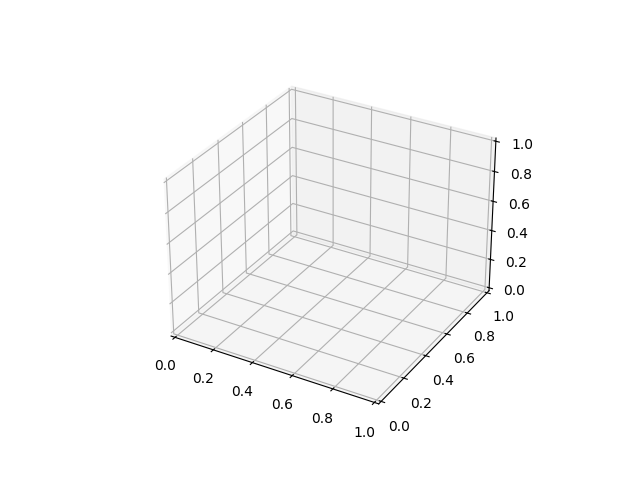

In [2]:
import matplotlib.pyplot as plt
%matplotlib ipympl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Function to draw a cube given its center and edge length
def draw_cube(ax, center, size):
    # Calculate the half-size (half edge length)
    half_size = size

    # Create the list of vertices for the cube
    x, y, z = center
    vertices = np.array([[x - half_size, y - half_size, z - half_size],
                         [x + half_size, y - half_size, z - half_size],
                         [x + half_size, y + half_size, z - half_size],
                         [x - half_size, y + half_size, z - half_size],
                         [x - half_size, y - half_size, z + half_size],
                         [x + half_size, y - half_size, z + half_size],
                         [x + half_size, y + half_size, z + half_size],
                         [x - half_size, y + half_size, z + half_size]])

    # Define the faces of the cube by connecting the vertices
    faces = [[vertices[j] for j in [0, 1, 2, 3]],
             [vertices[j] for j in [4, 5, 6, 7]],
             [vertices[j] for j in [0, 1, 5, 4]],
             [vertices[j] for j in [2, 3, 7, 6]],
             [vertices[j] for j in [0, 3, 7, 4]],
             [vertices[j] for j in [1, 2, 6, 5]]]

    # Plot the cube using Poly3DCollection
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=0.5, edgecolors='r', alpha=.025))

def draw_sphere(ax, center, radius):
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = center[0] + radius * np.cos(u) * np.sin(v)
    y = center[1] + radius * np.sin(u) * np.sin(v)
    z = center[2] + radius * np.cos(v)
    ax.plot_surface(x, y, z, color='b', alpha=0.6)

# Set up 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop through the cubes and draw them
for cube in cubes:
    draw_cube(ax, cube[:3], cube[3])

draw_sphere(ax, [0,0,0], 10)

# Set the limits and labels
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()


In [12]:
coordinates = []
with open("output2.txt") as file:
    while line := file.readline():
        line = line.rstrip()
        line = line.split(" ")
        xz = [(float(line[1]), float(line[2]))]
        coordinates.append(xz)

# coordinates = coordinates[:10]
coordinates

[[(-0.185733, 0.965624)],
 [(-0.202885, 0.962164)],
 [(-0.219974, 0.958402)],
 [(-0.236995, 0.954341)],
 [(-0.253943, 0.949982)],
 [(-0.270811, 0.945325)],
 [(-0.287595, 0.940373)],
 [(-0.304288, 0.935127)],
 [(-0.320886, 0.929589)],
 [(-0.337382, 0.92376)],
 [(-0.353772, 0.917644)],
 [(-0.37005, 0.911242)],
 [(-0.386212, 0.904556)],
 [(-0.402252, 0.89759)],
 [(-0.418165, 0.890345)],
 [(-0.433947, 0.882825)],
 [(-0.449593, 0.875032)],
 [(-0.465098, 0.866969)],
 [(-0.48046, 0.858638)],
 [(-0.495672, 0.850043)],
 [(-0.510731, 0.841185)],
 [(-0.525633, 0.832067)],
 [(-0.540373, 0.822692)],
 [(-0.554948, 0.813062)],
 [(-0.569351, 0.80318)],
 [(-0.58358, 0.793048)],
 [(-0.597629, 0.782671)],
 [(-0.611495, 0.77205)],
 [(-0.625172, 0.761188)],
 [(-0.638656, 0.75009)],
 [(-0.651943, 0.738758)],
 [(-0.665029, 0.727196)],
 [(-0.677908, 0.715408)],
 [(-0.690578, 0.703398)],
 [(-0.703034, 0.691168)],
 [(-0.715272, 0.678724)],
 [(-0.727287, 0.66607)],
 [(-0.739077, 0.653209)],
 [(-0.750637, 0.64014

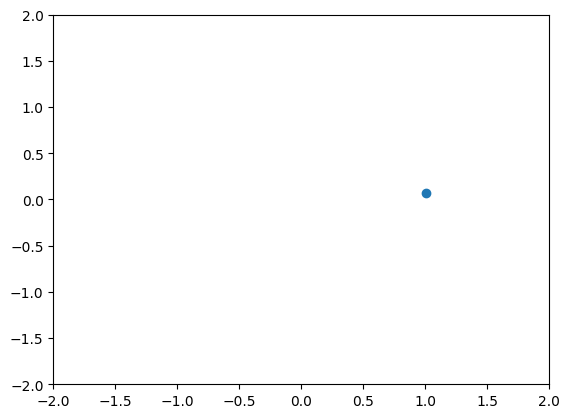

In [18]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)  # Adjust the x limits as needed
ax.set_ylim(-2, 2)  # Adjust the z limits as needed

# Initialize scatter plot
scat = ax.scatter([], [])

# Update function for animation
def update(frame):
    # Extract the current time step coordinates (float values)
    xz = coordinates[frame]
    
    # Update scatter plot with new data
    x, z = zip(*xz)  # Separate x and z values
    scat.set_offsets(list(zip(x, z)))
    
    return scat,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(coordinates), interval=10, blit=True)
ani.save("test.mp4")

# Show the animation
plt.show()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl
import re
import numpy as np


# Function to extract names and coordinates from a string
def extract_name_and_coordinates(line):
    matches = re.findall(r'\(([^,]+),([^,]+),([^)]+),([^)]+)\)', line)
    return [(match[0], match[1], float(match[2]), float(match[3])) for match in matches]

# Read the file and extract names and coordinates from each line
file_path = '/home/christianstaib/Documents/git/cpp_dijkstra/data.txt'  # Replace with the actual file path
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract frames of (name, x, y) tuples
frames = [extract_name_and_coordinates(line.strip()) for line in lines]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))
scatter = ax.scatter([], [])
texts = []  # List to hold the text annotations
ax.set_xlim(-10, 10)  # Adjust limits based on your data
ax.set_ylim(-10, 10)

# Initialize the scatter plot and text annotations
def init():
    scatter.set_offsets(np.empty((0, 2)))
    for text in texts:
        text.remove()  # Remove any existing text annotations
    texts.clear()
    return scatter,

# Update function for animation
def update(frame):
    names, type, x_vals, y_vals = zip(*frame)  # Unpack names, x, and y coordinates
    scatter.set_offsets(np.column_stack((x_vals, y_vals)))
    
#    # Remove old text annotations
#    for text in texts:
#        text.remove()
#    texts.clear()
#
#    # Add new text annotations at each scatter point
#    for name, type, x, y in frame:
#        text = ax.text(x, y, type, fontsize=8, ha='right', va='bottom')
#        texts.append(text)
    
    return scatter, *texts

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, repeat=False)

# Save the animation to an MP4 file
output_file = 'coordinate_animation_with_names_at_points.mp4'
writer = animation.FFMpegWriter(fps=int(10), metadata={'artist': 'Me'})
ani.save(output_file, writer=writer)

# Optional: Display the animation
plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f942283c1c0>>
Traceback (most recent call last):
  File "/home/christianstaib/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
KeyboardInterrupt: 


In [10]:
import pandas as pd

df = pd.read_csv("scenario1_without_planets_and_moons.csv")

df = df.drop(columns=['name'])
# df = df[["albedo"]]

nan_rows = df[df.isna().any(axis=1)]

nan_rows

,e,a,i,om,w,ma,epoch,H,albedo,diameter,class
17658,0.133091,1.954979,25.943586,33.425425,192.822445,302.844049,2455204.5,NaN,0.078,1.307,IMB
17669,0.139834,1.926176,23.614297,280.050872,332.126782,153.032068,2455209.5,NaN,0.050,1.429,MCA
17678,0.094052,1.845363,26.174927,15.136023,314.177256,202.429968,2455210.5,NaN,0.042,1.349,IMB
17699,0.159132,3.224266,7.577826,300.261596,87.029402,18.284054,2455214.5,NaN,0.078,2.737,OMB
17718,0.103484,1.924256,23.629145,254.652980,34.460774,257.133985,2455216.5,NaN,0.029,1.636,IMB
...,...,...,...,...,...,...,...,...,...,...,...
18307,0.122305,1.995907,23.910845,149.617641,300.562793,145.884831,2455399.5,NaN,0.051,1.413,IMB
18339,0.121407,1.954419,16.468239,19.101601,117.783055,105.529291,2455409.5,NaN,0.037,1.449,IMB
18342,0.204193,3.271187,33.248414,89.215019,157.826135,358.316783,2455410.5,NaN,0.061,2.705,OMB
18344,0.400165,4.845179,29.069102,81.920454,288.262132,1.891741,2455411.5,NaN,0.091,2.656,AST
